In [35]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import networkx as nx
import geopandas as gpd
import sys
sys.path.append('../geopandas_osm')
import geopandas_osm.osm
#!pip install geopandas
%matplotlib inline

In [15]:
land_use_data = pd.read_csv('2016_Land_Use_Data.csv')
crime_reports = pd.read_csv('Crime_Reports.csv')
peak_hour_traffic = pd.read_csv('Map_of_Average_Daily_and_Peak_hour_Traffic_Counts_1972_to_2014.csv')
police_dept_crash_data = pd.read_csv('Police_Department_Crash_Data_-_Historical.csv')
pothole_repair = pd.read_csv('Pothole_Repair_Requests.csv')
bike_facilities = pd.read_csv('RECREATION_BikeFacilities.csv')

In [26]:
!ls geolocation_data/

boston_massachusetts_admin.geojson
boston_massachusetts_aeroways.geojson
boston_massachusetts_amenities.geojson
boston_massachusetts_barrierpoints.geojson
boston_massachusetts_barrierways.geojson
boston_massachusetts_buildings.geojson
boston_massachusetts_housenumbers.geojson
boston_massachusetts_housenumbers_interpolated.geojson
boston_massachusetts_landusages.geojson
boston_massachusetts_places.geojson
boston_massachusetts_roads.geojson
boston_massachusetts_roads_gen0.geojson
boston_massachusetts_roads_gen1.geojson
boston_massachusetts_transport_areas.geojson
boston_massachusetts_transport_points.geojson
boston_massachusetts_waterareas.geojson
boston_massachusetts_waterways.geojson


https://michelleful.github.io/code-blog/2015/04/27/osm-data/

In [28]:
df = gpd.read_file('geolocation_data/boston_massachusetts_roads.geojson')
df.shape

(36349, 13)

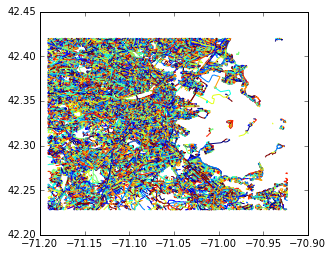

In [29]:
df.plot()

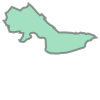

In [46]:
admin_df = gpd.read_file('geolocation_data/boston_massachusetts_admin.geojson')

# # Inspecting the file we want just the first row
sg_boundary = admin_df[admin_df.name == 'Cambridge'].iloc[0].geometry

sg_boundary 

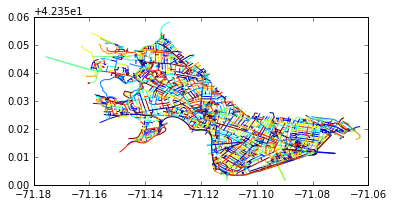

In [47]:
# Query for the highways within the `sg_boundary` we obtained earlier from the sg_admin.
# NB this does take on the order of minutes to run
df = geopandas_osm.osm.query_osm('way', sg_boundary, recurse='down', tags='highway')

# This gives us lots of columns we don't need, so we'll isolate it to the ones we do need
df = df[df.type == 'LineString'][['highway', 'name', 'geometry']]

df.plot()

In [38]:
df.head(5)

,highway,name,geometry
0,residential,Rogers Avenue,"LINESTRING (-71.111316 42.399507, -71.111436 4..."
1,residential,Wheatland Street,"LINESTRING (-71.0894381 42.3924168, -71.088697..."
2,residential,Munroe Street,"LINESTRING (-71.0955215 42.3831757, -71.095454..."
3,secondary,Somerville Avenue,"LINESTRING (-71.09556739999999 42.3796317, -71..."
4,secondary,Broadway,"LINESTRING (-71.11060620000001 42.3993875, -71..."


In [9]:
crime_reports.head(3)

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."


In [10]:
peak_hour_traffic.head(3)

,ID,PrimaryStreet,LocationDescription,Location,Source,1972,1981,1987,1989,1994,...,PMPeak2005,PMPeak2006,PMPeak2007,PMPeak2008,PMPeak2009,PMPeak2010,PMPeak2011,PMPeak2012,PMPeak2013,PMPeak2014
0,1,Massachusetts Avenue,South of Upland Road,"(42.3879544330999, -71.119331699400007)","Cordon Counts, Transportation Data Corporation",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN
1,2,Upland Road,West of Massachusetts Avenue,"(42.387467527399899, -71.120659863200004)","Cordon Counts, Accurate Counts 5/14/99",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN
2,3,Brattle Street,East of Ash Street,"(42.375767443500003, -71.124021953400003)","Cordon Counts, Accurate counts 5/10/99",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
land_use_data.head(3)

,Location,Map-Lot,Map,Lot,Land Area,Land Use Code,Land Use Category,Land Use Description,Mixed Use,Existing Units,Group Quarters,Grad Student Housing,Condo,Tax Status,Location 1
0,29 ALEWIFE BROOK PKWY,185-42,185,42,5323,104,Residential,TWO-FAM-RES,,2,,,,,"(42.402304780599898, -71.134265010899895)"
1,70 MATIGNON RD,185-48,185,48,4254,104,Residential,TWO-FAM-RES,,2,,,,,"(42.402275861, -71.133773709099898)"
2,66 MATIGNON RD,185-49,185,49,4703,104,Residential,TWO-FAM-RES,,2,,,,,"(42.4022327218999, -71.133621371900006)"


In [12]:
police_dept_crash_data.head(3)

,Crash Number,Date Time,Day Of Week,Object 1,Object 2,Street Number,Steet Name,Cross Street,Location,Latitude,Longitude,Coordinates
0,24029,04/10/2010 09:39:00 AM,Saturday,Auto,Fixed Object,NaN,NaN,NaN,"& Cambridge, MA",NaN,NaN,NaN
1,24555,08/02/2010 11:55:00 PM,Monday,Auto,Auto,NaN,OXFORD AVE,NaN,"OXFORD AVE & Cambridge, MA",NaN,NaN,NaN
2,24967,10/23/2010 12:53:00 PM,Saturday,Taxi,Bicycle,NaN,NaN,NaN,"& Cambridge, MA",NaN,NaN,NaN


In [16]:
pothole_repair.head(3)

,Request ID,Status,Action Type,Date Submitted,Date Completed,Address,Platform,Submitted By
0,REQ491298,Closed,Repair Pothole in Street,06/18/2014 12:00:00 AM,06/24/2014 12:00:00 AM,"237 Pearl St\nCambridge, MA\n(42.3588918560004...",NaN,kpark
1,REQ410799,Closed,Repair Pothole in Street,06/07/2012 12:00:00 AM,06/12/2012 12:00:00 AM,"104 Mt Auburn St\nCambridge, MA\n(42.372832162...",NaN,web-services
2,REQ479685,Closed,Repair Pothole in Street,03/10/2014 12:00:00 AM,03/10/2014 12:00:00 AM,"23 Sidney St\nCambridge, MA\n(42.3621827730004...",NaN,bsmyth
